In [10]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

import torch
import glob
from collections import defaultdict

In [11]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
           data[k].append(d[k]) 
        
    return data

In [12]:
# Load digits (VAE online)
exp151_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp151_*") 
exp151 = get_data(exp151_files, "correct")

exp152_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp152_*") 
exp152 = get_data(exp152_files, "correct")

# Load fashion
exp1_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/fashion_exp1*") 
exp1 = get_data(exp1_files, "correct")

exp2_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/fashion_exp2_*") 
exp2 = get_data(exp2_files, "correct")

In [13]:
# Load leak controls (digits)
exp155_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*") 
exp155 = get_data(exp155_files, "correct")

exp157_s01_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s01_*") 
exp157_s01 = get_data(exp157_s01_files, "correct")

exp157_s02_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s02_*") 
exp157_s02 = get_data(exp157_s02_files, "correct")

exp158_s03_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s03_*") 
exp158_s03 = get_data(exp158_s03_files, "correct")

# exp158_s035_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s035_*") 
# exp158_s035 = get_data(exp158_s035_files, "correct")

exp158_s04_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s04_*") 
exp158_s04 = get_data(exp158_s04_files, "correct")

exp157_s05_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s05_*") 
exp157_s05 = get_data(exp157_s05_files, "correct")

exp157_s06_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s06_*") 
exp157_s06 = get_data(exp157_s06_files, "correct")

In [14]:
# Load connection noise controls (digits)
exp155_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*") 
exp155 = get_data(exp155_files, "correct")

exp159_s01_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s01_*") 
exp159_s01 = get_data(exp159_s01_files, "correct")

exp159_s05_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s05_*") 
exp159_s05 = get_data(exp159_s05_files, "correct")

exp159_s1_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s1_*") 
exp159_s1 = get_data(exp159_s1_files, "correct")

exp159_s2_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp159_s2_*") 
exp159_s2 = get_data(exp159_s2_files, "correct")

In [15]:
# Load connection loss controls (digits)
exp155_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*") 
exp155 = get_data(exp155_files, "correct")

exp160_p01_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p01_*") 
exp160_p01 = get_data(exp160_p01_files, "correct")

exp160_p05_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p05_*") 
exp160_p05 = get_data(exp160_p05_files, "correct")

exp160_p1_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p1_*") 
exp160_p1 = get_data(exp160_p1_files, "correct")

exp160_p2_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p2_*") 
exp160_p2 = get_data(exp160_p2_files, "correct")

# Figure 1

Overall AAN results, for digits only

In [16]:
# Init the figure
fig = plt.figure(figsize=(20, 1), constrained_layout=True)
grid = plt.GridSpec(nrows=26, ncols=10, wspace=-.40, hspace=0.4, figure=fig)

<Figure size 1440x72 with 0 Axes>

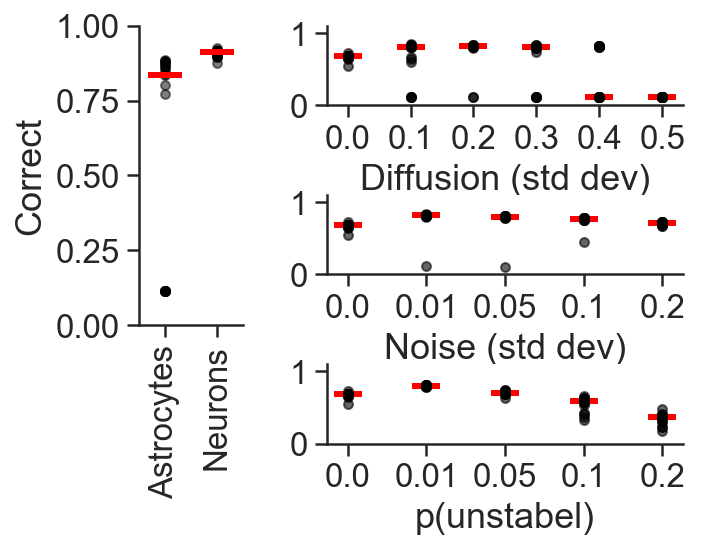

In [24]:
# Panel 1 - digits
plt.subplot(grid[0:18, 0])
medians = [np.median(exp151["correct"]), np.median(exp152["correct"])]
plt.scatter(x=np.repeat(0.25, 20), y=exp151["correct"], s=20, color="black", alpha=0.5, marker="o")
plt.scatter(x=np.repeat(0.75, 20), y=exp152["correct"], s=20, color="black", alpha=0.5, marker="o")
plt.scatter(x=[0.25, 0.75], y=medians, color="red", alpha=1, s=300, linewidth=3, marker="_")
plt.xticks(np.array([0.25, 0.75]), ('Astrocytes', 'Neurons'))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xticks(rotation=90)
plt.ylabel("Correct")

# -------------------------------------------------
model_names = ["0.0","0.1", "0.2", "0.3", "0.4", "0.5"]
models = [exp155, exp157_s01, exp157_s02, exp158_s03, exp158_s04, exp157_s05, exp157_s06]
medians = [
    np.median(exp155["correct"]), 
    np.median(exp157_s01["correct"]),
    np.median(exp157_s02["correct"]),
    np.median(exp158_s03["correct"]),
    np.median(exp158_s04["correct"]),
    np.median(exp157_s05["correct"]),
]
plt.subplot(grid[0:5, 3:8])
plt.scatter(x=model_names, y=medians, color="red", alpha=1, s=200, linewidth=3, marker="_")
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.6, s=20)
plt.ylim(0, 1.1)
plt.ylabel("")
plt.xlabel("Diffusion (std dev)")
_ = sns.despine()


# -------------------------------------------------
model_names = ["0.0", "0.01", "0.05", "0.1", "0.2"]
models = [exp155, exp159_s01, exp159_s05, exp159_s1, exp159_s2]
medians = [
    np.median(exp155["correct"]), 
    np.median(exp159_s01["correct"]),
    np.median(exp159_s05["correct"]),
    np.median(exp159_s1["correct"]),
    np.median(exp159_s2["correct"]),
]

plt.subplot(grid[10:15, 3:8])
plt.scatter(x=model_names, y=medians, color="red", alpha=1, s=200, linewidth=3, marker="_")
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.6, s=20)
plt.ylim(0, 1.1)
plt.ylabel("")
plt.xlabel("Noise (std dev)")
_ = sns.despine()

# -------------------------------------------------
model_names = ["0.0", "0.01", "0.05", "0.1", "0.2"]
models = [exp155, exp160_p01, exp160_p05, exp160_p1, exp160_p2]
medians = [
    np.median(exp155["correct"]), 
    np.median(exp160_p01["correct"]),
    np.median(exp160_p05["correct"]),
    np.median(exp160_p1["correct"]),
    np.median(exp160_p2["correct"]),
]
plt.subplot(grid[20:25, 3:8])
plt.scatter(x=model_names, y=medians, color="red", alpha=1, s=200, linewidth=3, marker="_")
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.6, s=20)
plt.ylim(0, 1.1)
plt.ylabel("")
plt.xlabel("p(unstabel)")
_ = sns.despine()

plt.savefig("figure_janelia_digits.png", bbox_inches="tight")